In [26]:
%load_ext lab_black
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
import sklearn.ensemble as en
import sklearn.tree as tree
import matplotlib.pyplot as plt
from src.linear_coef_matching import LCM
from src.linear_coef_matching_mf import LCM_MF
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [2]:
data = pd.read_csv("/Users/harshparikh/Documents/max_df_coarsen.csv", index_col=0)

data.head()

,Gender,Age,Marrital,iGCS-Total,iGCS = T?,Worst GCS in 1st 24h,Worst GCS intub,APACHE II 1st 24h,SBP highest (1st 24h),SBP lowest (1st 24h),...,phenobarbital_50,propofol_Hill,propofol_50,valproate_Hill,valproate_50,Y,T,Race_Asian,Race_Black or African American,Race_White or Caucasian
sid3,1,45.91,1,8,0,8,0,15,148,139,...,31.258455,22.956908,28.551287,9.440983,50.069078,1,"(0.88, 1)",0,0,1
sid4,1,53.99,1,4,0,3,1,29,170,50,...,31.258455,23.802689,34.336808,9.440983,50.069078,1,"(0.88, 1)",0,0,1
sid5,1,23.08,0,6,1,3,1,22,126,96,...,31.258455,23.346894,33.508543,9.440983,50.069078,0,"(0.12, 1)",0,0,1
sid7,1,32.11,1,3,1,3,1,16,133,112,...,31.258455,26.847907,29.452211,9.440983,50.069078,1,"(0.88, 1)",0,0,0
sid8,0,67.24,0,12,0,11,0,14,200,147,...,31.258455,26.111897,34.910724,9.440983,50.069078,1,"(0.88, 1)",0,0,0


In [4]:
lcm = LCM_MF(
    outcome="Y", treatment="T", data=data, n_splits=3, n_repeats=1, random_state=0
)

lcm.fit(model="linear", separate_treatments=True)

{'(0.12, 0)': 0.8928571428571429, '(0.12, 1)': 0.7702702702702703, '(0.38, 0)': 0.8666666666666667, '(0.38, 1)': 0.8620689655172413, '(0.62, 0)': 1.0, '(0.62, 1)': 0.84, '(0.88, 0)': 0.8333333333333334, '(0.88, 1)': 0.908256880733945}
{'(0.12, 0)': 0.8928571428571429, '(0.12, 1)': 0.9324324324324325, '(0.38, 0)': 0.8, '(0.38, 1)': 1.0, '(0.62, 0)': 1.0, '(0.62, 1)': 0.84, '(0.88, 0)': 0.926829268292683, '(0.88, 1)': 0.8990825688073395}
{'(0.12, 0)': 0.8275862068965517, '(0.12, 1)': 0.8513513513513513, '(0.38, 0)': 1.0, '(0.38, 1)': 0.6785714285714286, '(0.62, 0)': 0.9090909090909091, '(0.62, 1)': 0.92, '(0.88, 0)': 0.8095238095238095, '(0.88, 1)': 0.8796296296296297}


In [69]:
lcm.MG(k=5)
lcm.CATE(cate_methods=["mean"], diameter_prune=0.00001)

In [72]:
lcm.M_list

[array([ 0.375     ,  9.91245799,  0.375     ,  0.61076013,  0.375     ,
         0.55807425,  0.375     , 10.08288206,  3.86576982,  1.62529256,
         1.53787357,  1.04160098,  2.28789422,  5.30760654,  0.375     ,
         0.375     ,  0.375     ,  0.375     ,  0.375     ,  0.375     ,
         0.375     ,  0.375     ,  0.375     ,  0.375     ,  0.375     ,
         0.375     ,  0.375     ,  0.375     ,  0.375     ,  0.375     ,
         0.375     ,  0.375     ,  0.375     ,  0.375     ,  0.375     ,
         0.375     ,  0.375     ,  0.82006959,  0.375     ,  0.375     ,
         0.375     ,  0.375     ,  4.60088711,  1.25893638,  0.375     ,
         0.375     ,  0.375     ,  0.375     ,  0.375     ,  0.375     ,
         0.375     ,  0.375     ,  0.375     ,  0.375     ,  0.375     ,
         0.375     ,  0.375     ,  0.375     ,  0.375     ,  0.375     ,
         0.375     ,  0.375     ,  0.375     ,  0.375     ,  0.375     ,
         0.375     ,  0.375     ,  0.375     ,  0.3

<AxesSubplot:xlabel='index'>

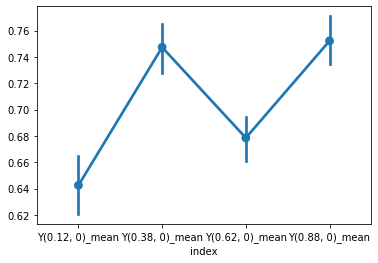

In [71]:
sns.pointplot(
    data=lcm.cate_df[
        ["Y(0.12, 0)_mean", "Y(0.38, 0)_mean", "Y(0.62, 0)_mean", "Y(0.88, 0)_mean"]
    ]
    .T.reset_index()
    .groupby(by="index")
    .mean()
    .T
)

In [ ]:
treatment_arms = np.unique(data["T"])
data_T = {}
for T in treatment_arms:
    data_T[T] = data.loc[data["T"] == T]

In [ ]:
treatment_arms

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=["T", "Y"]), data["Y"], stratify=data["T"]
)

In [ ]:
m = en.GradientBoostingClassifier().fit(X_train, y_train)

In [ ]:
accuracy_score(y_test, m.predict(X_test))

In [ ]:
m.score(X_test, y_test)

In [ ]:
df_new = data.copy(deep=True)

In [ ]:
treatment_map = {
    "(0.12, 0)": "(0, 0)",
    "(0.12, 1)": "(0, 1)",
    "(0.38, 0)": "(0, 0)",
    "(0.38, 1)": "(0, 1)",
    "(0.62, 0)": "(1, 0)",
    "(0.62, 1)": "(1, 1)",
    "(0.88, 0)": "(1, 0)",
    "(0.88, 1)": "(1, 1)",
}

In [ ]:
df_new["T"] = df_new["T"].apply(lambda x: treatment_map[x])

In [ ]:
df_new["T"]

In [ ]:
df_new = df_new.loc[(df_new["T"] == "(0, 0)") | (df_new["T"] == "(1, 0)")]

In [ ]:
df_new["T"] = df_new.apply(lambda x: int(x["T"][1]), axis=1)

In [ ]:
lcm = LCM_MF("Y", "T", data=df_new, n_splits=3, n_repeats=1)

In [ ]:
lcm.fit(method="linear")

In [ ]:
lcm.MG(k=5)

In [ ]:
lcm.CATE(cate_methods=[["mean", False]])

In [ ]:
lcm.cate_df

In [ ]:
lcm.cate_df["avg.CATE_mean"].hist()